<a href="https://colab.research.google.com/github/marekcrn/MLF/blob/main/Project-final/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split

###################################
# Write your own code here #

from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adam, AdamW
from keras.datasets import cifar10
from keras.utils import to_categorical
import cv2
import os
from PIL import Image
###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_images_from_folder(folder, n_img: int):
    images = []
    for i in range(n_img+1):
        img_path = os.path.join(folder, f"img_{i}.png")
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

In [4]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(20 + 51*id_label, 55, label)
  plt.axis('off')
  plt.show()

In [5]:
def separate_rgb_from_images(images_array):
    # Separate RGB colors from array of images
    red_channel = images_array[:, :, :, 0]  # Extract Red channel
    green_channel = images_array[:, :, :, 1]  # Extract Green channel
    blue_channel = images_array[:, :, :, 2]  # Extract Blue channel

    return red_channel, green_channel, blue_channel

In [ ]:
num_images = 16182
X_train =load_images_from_folder("/content/drive/MyDrive/Final Project/train_data_unlabeled",num_images)

In [ ]:
num_images = 4796
X_test =load_images_from_folder("/content/drive/MyDrive/Final Project/test_data_unlabeled",num_images)

In [ ]:
np.save('/content/drive/MyDrive/Final Project/X_test_data.npy', X_test)
np.save('/content/drive/MyDrive/Final Project/X_train_data.npy', X_train)

In [18]:
X_train = np.load('/content/drive/MyDrive/Final Project/X_train_data.npy')
X_test = np.load('/content/drive/MyDrive/Final Project/X_test_data.npy')
y_train = pd.read_csv('/content/drive/MyDrive/Final Project/y_train.csv')
y_train = y_train['target']
y_train

0        0
1        1
2        0
3        2
4        2
        ..
16177    1
16178    3
16179    2
16180    0
16181    1
Name: target, Length: 16182, dtype: int64

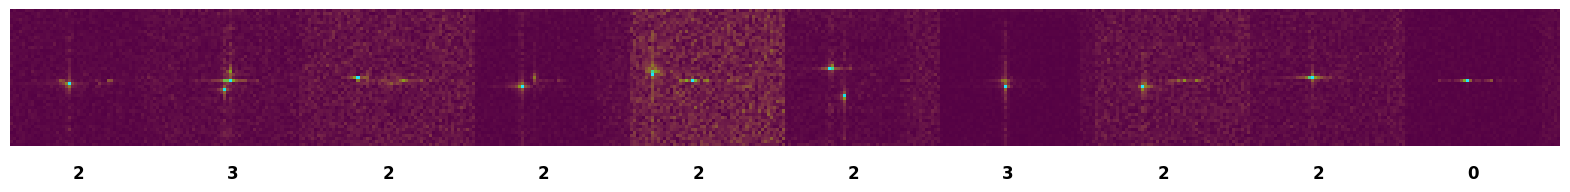

In [ ]:
display_random_images(X_train, y_train)

In [ ]:
X_train.shape

(16182, 45, 51, 3)

In [ ]:
y_train.shape

(16182,)

In [ ]:
print(y_train)

0        0
1        1
2        0
3        2
4        2
        ..
16177    1
16178    3
16179    2
16180    0
16181    1
Name: target, Length: 16182, dtype: int64


In [ ]:
red_channel, green_channel, blue_channel = separate_rgb_from_images(X_train)

<Figure size 640x480 with 0 Axes>

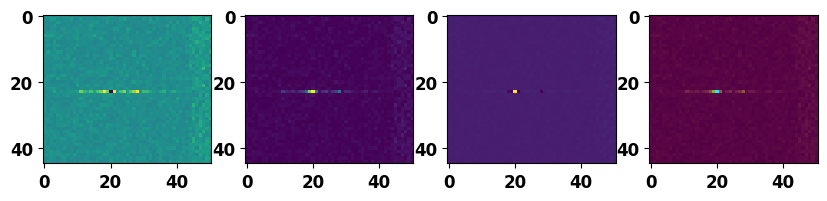

In [ ]:
plt.figure()
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
axs[0].imshow(red_channel[0])
axs[1].imshow(green_channel[0])
axs[2].imshow(blue_channel[0])
axs[3].imshow(X_train[0])
plt.show()

In [9]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [47]:
X_train_exp = np.expand_dims(X_train_split, -1)
#X_train_exp = np.expand_dims(X_train, -1)
#X_train_exp = np.expand_dims(green_channel, -1)
X_train_scaled = X_train_exp.astype('float32') / 255.0
y_train_encoded = to_categorical(y_train_split, num_classes=4)

In [57]:
# Best model so far
# 1 - 'gelu' = 'relu' = 'relu6' = 'silu'; 2 -'leaky_relu' = 'selu'; 3 - 'softplus' = 'softmax' = 'sigmoid'
# 1 - all = green; 2 - blue; 3 - red
#model = Sequential()
#model.add(Conv2D(64, (3, 3), activation='gelu', input_shape=(45, 51, 3)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(128, (3, 3), activation='gelu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(128, activation='gelu'))
#model.add(Dropout(0.1))
#model.add(Dense(4, activation='softmax'))

model = Sequential()
#model.add(Conv2D(32, (3, 3), activation='gelu', input_shape=(45, 51, 1)))
model.add(Conv2D(32, (3, 3), activation='gelu', input_shape=(45, 51, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='gelu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='gelu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

In [58]:
loss = 'categorical_crossentropy' # 1 - 'categorical_crossentropy' = 'categorical_focal_crossentropy' = 'poisson'
metrics = 'accuracy' # 1 - 'accuracy' = 'categorical_accuracy'
learning_rate = 0.001 #1 - 0.001; 2 - 0.01; 3 - 0.0001; 4 - 0.1
optimizer = AdamW(learning_rate = learning_rate) #1 - Adam; 2 - AdamW; 3 - Adagrad; 4 - SGD
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 43, 49, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 41, 47, 64)        18496     
                                                                 
 flatten_12 (Flatten)        (None, 123328)            0         
                                                                 
 dense_48 (Dense)            (None, 64)                7893056   
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 4)                 260       
                                                                 
Total params: 7912708 (30.18 MB)
Trainable params: 79

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split = 0.2)

In [55]:
X_test_exp = np.expand_dims(X_test_split, -1)
X_test_preprocessed = X_test_exp.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test_split, num_classes=4)

In [56]:
score = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.1196896955370903
Test accuracy: 94.99536752700806 %


In [ ]:
red_channel2, green_channel2, blue_channel2 = separate_rgb_from_images(X_test)

In [38]:
y_test_pred = model.predict(X_test)
y_test_labels = np.argmax(y_test_pred, axis=1)
y_test = pd.DataFrame({'id': range(len(y_test_labels)), 'target': y_test_labels})
y_test.to_csv('/content/drive/MyDrive/Final Project/y_test.csv', index=False)

150/150 [==============================] - 10s 63ms/step


# Hyper optimalization

